In [1]:
from Windowing import *
import seaborn as sns

# 0. Introduction
We will use this to make a nice heatmap to really show that MDS works better with lesst data and MMF better with more

# 1. Load data

In [ ]:
win = Windowing(aggCurves)
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024, 1448, 2048, 2896])

win.MDS()
win.MMF()
win.Last()

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


# 2. Plot

In [13]:
# since we don't have a nice heatmap function, we will do this by hand
MMF = win.results['MMF']['test error']
MDS = win.results['MDS']['test error']
Last = win.results['Last']['test error']

averagesMMF = np.nanmean(MMF, axis = (0,1))
averagesMDS = np.nanmean(MDS, axis = (0,1))
averagesLast = np.nanmean(Last, axis = (0,1))



MMFvsMDS =  MMF - MDS
averagesMMFvsMDS = np.nanmean(MMFvsMDS, axis = (0,1))

C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\1664241243.py:6: RuntimeWarning: Mean of empty slice
  averagesMMF = np.nanmean(MMF, axis = (0,1))
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\1664241243.py:7: RuntimeWarning: Mean of empty slice
  averagesMDS = np.nanmean(MDS, axis = (0,1))
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\1664241243.py:8: RuntimeWarning: Mean of empty slice
  averagesLast = np.nanmean(Last, axis = (0,1))
C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\1664241243.py:13: RuntimeWarning: Mean of empty slice
  averagesMMFvsMDS = np.nanmean(MMFvsMDS, axis = (0,1))


In [17]:
MMF

array([[[[4.42466140e-02, 9.37601924e-02, 1.40151024e-01, ...,
          2.79305339e-01, 2.82600641e-01,            nan],
         [           nan, 1.66934133e-02, 3.56705189e-02, ...,
          8.31527710e-02, 8.48146677e-02,            nan],
         [           nan,            nan, 2.19198465e-02, ...,
          6.97582960e-03, 6.41375780e-03,            nan],
         ...,
         [           nan,            nan,            nan, ...,
          5.60039282e-03, 8.62801075e-03,            nan],
         [           nan,            nan,            nan, ...,
                     nan, 6.50954247e-03,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[4.94626760e-02, 9.75302458e-02, 1.44432545e-01, ...,
          3.05348694e-01, 3.09002638e-01,            nan],
         [           nan, 1.17554665e-02, 2.86502838e-02, ...,
          9.34764147e-02, 9.55703855e-02,            nan],
        

In [8]:
# To use in vmin and vmax
print(np.nanmax(averagesMMF))
print(np.nanmax(averagesMDS))
print(np.nanmax(averagesLast))
print('\n')
print(np.nanmin(averagesMMFvsMDS))
print(np.nanmax(averagesMMFvsMDS))

0.16754366
0.10405420508480231
0.1614487145958996


-0.061383517839314866
0.00392142790713486


C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\2842452659.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax[0].imshow(averagesMMF, cmap = 'seismic', vmin = 0, vmax = 0.1), cax=cbar_ax, label = 'Mean absolute error')


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/heatmap.png'

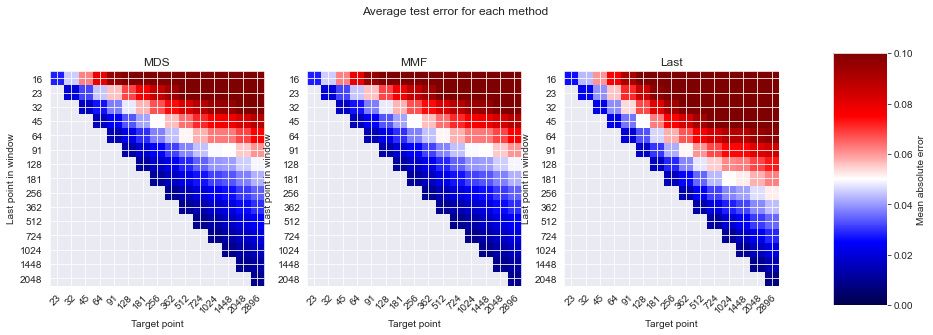

In [9]:
# plot the heatmaps for each side by side
fig, ax = plt.subplots(1,3, figsize = (15,5))

ax[0].imshow(averagesMDS, cmap = 'seismic', vmin = 0, vmax = 0.1)
ax[1].imshow(averagesMMF, cmap = 'seismic', vmin = 0, vmax = 0.1)
ax[2].imshow(averagesLast, cmap = 'seismic', vmin = 0, vmax = 0.1)

ax[0].set_title('MDS')
ax[1].set_title('MMF')
ax[2].set_title('Last')

# set (tick) labela
for i in range(3):
        ax[i].set_xticks(np.arange(len(win.target_anchors)))
        ax[i].set_yticks(np.arange(len(win.train_anchors)))
        ax[i].set_xticklabels(win.target_anchors)
        ax[i].set_yticklabels(win.train_anchors)
        ax[i].set_xlabel('Target point')
        ax[i].set_ylabel('Last point in window')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

# set colorbar for all subplots the same
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax[0].imshow(averagesMMF, cmap = 'seismic', vmin = 0, vmax = 0.1), cax=cbar_ax, label = 'Mean absolute error')

# set title
fig.suptitle('Average test error for each method')

plt.savefig('../Plots/heatmap.png', dpi = 800)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_15000\1856637442.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.imshow(MMFvsMDS, cmap = 'coolwarm', vmin = -0.1, vmax = 0.1))


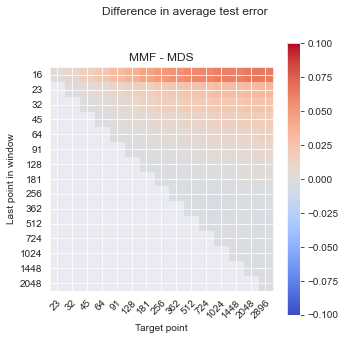

In [38]:
# Now for the difference
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.imshow(MMFvsMDS, cmap = 'coolwarm', vmin = -0.1, vmax = 0.1)
ax.set_title('MMF - MDS')

# set (tick) labela
ax.set_xticks(np.arange(len(win.target_anchors)))
ax.set_yticks(np.arange(len(win.train_anchors)))
ax.set_xticklabels(win.target_anchors)
ax.set_yticklabels(win.train_anchors)
ax.set_xlabel('Target point')
ax.set_ylabel('Last point in window')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# set colorbar for all subplots the same
fig.colorbar(ax.imshow(MMFvsMDS, cmap = 'coolwarm', vmin = -0.1, vmax = 0.1))

# set title
fig.suptitle('Difference in average test error')

#set background color of plot to black
# ax.set_facecolor('0.9')
# fig.set_facecolor('0.9')

plt.savefig('Plots/heatmap_diff.png', dpi = 800)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_8836\3396683856.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.imshow(averagesMMFvsMDS, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))


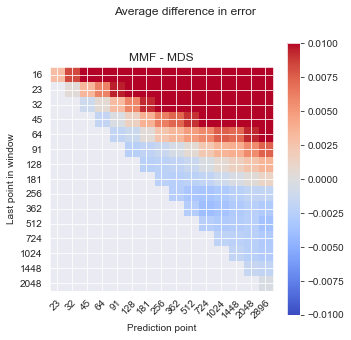

In [19]:
# Same but zoom in
fig, ax = plt.subplots(1,1, figsize = (5,5))

ax.imshow(averagesMMFvsMDS, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01)
ax.set_title('MMF - MDS')

# set (tick) labela
ax.set_xticks(np.arange(len(win.target_anchors)))
ax.set_yticks(np.arange(len(win.train_anchors)))
ax.set_xticklabels(win.target_anchors)
ax.set_yticklabels(win.train_anchors)
ax.set_xlabel('Prediction point')
ax.set_ylabel('Last point in window')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# set colorbar for all subplots the same
fig.colorbar(ax.imshow(averagesMMFvsMDS, cmap = 'coolwarm', vmin = -0.01, vmax = 0.01))

# set title
fig.suptitle('Average difference in error')

plt.savefig('../Plots/mean.png', dpi = 800)